In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.8 MB/s eta 0:00:00


In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

In [143]:
dfC = pd.read_csv('/content/drive/MyDrive/eCommerce/Customer_info.csv')
dfD = pd.read_csv('/content/drive/MyDrive/eCommerce/Discount_info.csv')
dfM = pd.read_csv('/content/drive/MyDrive/eCommerce/Marketing_info.csv')
dfO = pd.read_csv('/content/drive/MyDrive/eCommerce/Onlinesales_info.csv')
dfT = pd.read_csv('/content/drive/MyDrive/eCommerce/Tax_info.csv')
pd.set_option('display.max_columns',None)

In [144]:
dfO.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [145]:
def period(x):
  if int(x) <= 10:
    return '초'
  elif int(x) <= 20:
    return '중'
  else:
    return '말'

In [152]:
dfO['거래날짜'] = pd.to_datetime(dfO['거래날짜'])
dfM['날짜'] = pd.to_datetime(dfM['날짜'])
# dfO['구매금액'] = dfO['수량']*dfO['평균금액']

dfO['초중말'] = dfO['거래날짜'].map(lambda x:datetime.strftime(x,'%d'))
dfO['초중말'] = dfO['초중말'].apply(period)
dfO['년'] = dfO['거래날짜'].map(lambda x:datetime.strftime(x,'%y'))
dfO['월'] = dfO['거래날짜'].map(lambda x:datetime.strftime(x,'%b'))
weekday = {0: '월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'}
dfO['요일'] = dfO['거래날짜'].map(lambda x: weekday[datetime.weekday(x)])

a = dfO.merge(dfC, on=['고객ID'])
a['가입기간'] = a['가입기간']/12

b = a.merge(dfD, on=['월','제품카테고리'])
b.drop('쿠폰코드',axis=1,inplace=True)
c = b.merge(dfM,left_on=['거래날짜'], right_on=['날짜'])
c.drop('날짜',axis=1,inplace=True)
df = c.merge(dfT, on=['제품카테고리'])

if df[df['쿠폰상태']== 'Used'] :
  df['수량'] * df['평균금액'] * (1 - df['할인율']) * (1 + df['GST'])
else:
  df['수량'] * df['평균금액'] * (1 + df['GST'])

df

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# 0. 군집화

In [ ]:
df_pv = df.pivot_table(index='고객ID',columns='제품카테고리',values='구매금액', aggfunc='sum').fillna(0).reset_index()

# fillna(0)을 해도 괜찮은 이유
# 결과값 = 구매금액의 sum값
# NaN = 구매를 안함 = 구매금액의 sum값 == 0
df_pv

제품카테고리,고객ID,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
0,USER_0000,0.00,0.0,19.99,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,11.00,0.00
1,USER_0001,2.99,0.0,8902.01,27.94,0.00,31.93,0.0,37.98,0.0,9.57,628.0,0.00,3917.00,0.00,255.10,0.00
2,USER_0002,0.00,0.0,49.74,244.39,0.00,418.24,0.0,0.00,0.0,29.99,0.0,0.00,475.00,0.00,224.76,0.00
3,USER_0003,0.00,0.0,173.59,0.00,0.00,0.00,0.0,32.60,0.0,0.00,0.0,303.76,850.12,0.00,0.00,0.00
4,USER_0004,0.00,0.0,276.30,4.99,0.00,47.37,0.0,0.00,0.0,14.00,398.0,0.00,655.00,0.00,46.81,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,0.00,0.0,156.66,0.00,0.00,10.39,0.0,0.00,0.0,0.00,0.0,0.00,0.00,359.70,0.00,0.00
1464,USER_1464,27.18,0.0,344.32,167.97,2.39,70.36,0.0,55.81,0.0,0.00,0.0,0.00,1259.00,166.12,201.53,21.57
1465,USER_1465,0.00,0.0,98.38,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,3.18,0.00
1466,USER_1466,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,298.00,0.00,0.00,0.00


In [ ]:
# R : 기준일로부터 최근 거래일
# 해당 데이터는 19년1월1일 ~ 19년11월26일까지이므로 1년을 기준으로 분석해야하므로 19년12월31일을 기준일로 정하자
df_last = df.sort_values(['고객ID','거래날짜'], ascending=False)
latest_purchase_index = df_last[['고객ID']].drop_duplicates().index
latest_purchase_date = df_last.loc[lambda x : x.index.isin(latest_purchase_index)]
df_last = latest_purchase_date.sort_values(['고객ID'], ascending=True).reset_index()[['고객ID','거래날짜']]
df_last.rename(columns={'거래날짜':'마지막거래날짜'}, inplace=True)

df_last['R'] = pd.to_datetime('2020-01-01') - df_last['마지막거래날짜']
rfm_R = df_last[['고객ID','R']]

# F : 총 거래 횟수
rfm_F = df.groupby('고객ID')['거래ID'].count().reset_index()
rfm_F.rename(columns={'거래ID':'F'}, inplace=True)
rfm_F

# 가입기간으로 나눠보자


# M : 총 소비금액
rfm_M = df.groupby('고객ID')['구매금액'].sum().reset_index()
rfm_M.rename(columns={'구매금액':'M'},inplace=True)
rfm_M

rfm = rfm_R.merge(rfm_F,on=['고객ID']).merge(rfm_M,on=['고객ID'])
rfm['R']=rfm['R'].astype(str)
rfm['R']=rfm['R'].str.extract(r'(\d+)').astype(int)
rfm

,고객ID,R,F,M
0,USER_0000,108,2,30.99
1,USER_0001,60,59,13812.52
2,USER_0002,74,23,1442.12
3,USER_0003,18,17,1360.07
4,USER_0004,108,36,1442.47
...,...,...,...,...
1463,USER_1463,271,6,526.75
1464,USER_1464,88,39,2316.25
1465,USER_1465,195,8,101.56
1466,USER_1466,70,1,298.00


## 시작


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
from scipy.stats import boxcox
from sklearn.preprocessing import RobustScaler
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import statistics
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

rfm = pd.read_csv("/content/drive/MyDrive/eCommerce/rfm.csv")
print(rfm.columns)

rfm.rename(columns={'Recency':'R','Frequency':'F','Monetary':'M'},inplace=True)
rfm

# 히스토그램과 상자그림 시각화

def Distributions(df):
  fig, axes = plt.subplots(3, 2, figsize=(12, 18))

  # 각 칼럼에 대한 히스토그램
  axes[0, 0].hist(df['R'], bins=20, color='skyblue', alpha=0.7)
  axes[0, 0].set_title('R - Histogram')
  axes[0, 0].set_xlabel('Value')
  axes[0, 0].set_ylabel('Frequency')


  axes[1, 0].hist(df['F'], bins=20, color='orange', alpha=0.7)
  axes[1, 0].set_title('F - Histogram')
  axes[1, 0].set_xlabel('Value')
  axes[1, 0].set_ylabel('Frequency')


  axes[2, 0].hist(df['M'], bins=20, color='green', alpha=0.7)
  axes[2, 0].set_title('M - Histogram')
  axes[2, 0].set_xlabel('Value')
  axes[2, 0].set_ylabel('Frequency')


  # 각 칼럼에 대한 상자그림
  axes[0, 1].boxplot(df['R'], vert=False)
  axes[0, 1].set_title('R - Box Plot')
  axes[0, 1].set_yticklabels([''])

  axes[1, 1].boxplot(df['F'], vert=False)
  axes[1, 1].set_title('F - Box Plot')
  axes[1, 1].set_yticklabels([''])

  axes[2, 1].boxplot(df['M'], vert=False)
  axes[2, 1].set_title('M - Box Plot')
  axes[2, 1].set_yticklabels([''])

  plt.tight_layout()
  plt.show()

def LossFunc(df):
  min_loss = float('inf')
  best_model = None
  best_k = None
  loss_list = []

  for k in range(2, 10):  # 클러스터 수를 2부터 9까지 시도
      kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
      kmeans.fit(df[['R','F','M']])
      loss = kmeans.inertia_  # K-Means의 경우 손실 함수로 inertia_ 값을 사용함 (SSE)
      print("Cluster:", k, "Loss:", loss)
      loss_list.append(loss)
      # 손실이 최소인 모델 업데이트
      if loss < min_loss:
          min_loss = loss
          best_model = kmeans
          best_k = k

  print("Best Cluster:", best_k, "Best Loss:", min_loss)
  print("Loss Avg:",statistics.mean(loss_list))

  loss_list_diff = []
  for i in range(len(loss_list)-1):
    loss_list_diff.append(loss_list[i]-loss_list[i+1])
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, len(loss_list_diff) + 1), loss_list_diff, marker='o', linestyle='-')
  plt.title('Decrease Amount at Each Step')
  plt.xlabel('Step')
  plt.ylabel('Decrease')
  plt.xticks(range(1, len(loss_list_diff) + 1))
  plt.grid(True)
  plt.show()

def ElbowMethod(df):
  kmeans = KMeans(random_state=42,n_init=10)
  elbow = KElbowVisualizer(kmeans,k=(2,10))
  elbow.fit(df[['R','F','M']].values)
  elbow.show()

def SilhouetteScore(df):
  silhouette_scores=[]
  for i in range(2,10):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=42)
    cluster_labels = kmeans.fit_predict(df[['R','F','M']])
    silhouette_avg = silhouette_score(df[['R','F','M']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

  plt.plot(range(2,10), silhouette_scores, marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Silhouette score')
  plt.title('Silhouette Score for Different Number of Clusters')
  plt.show()
  print(silhouette_scores)


Index(['고객ID', 'Recency', 'Frequency', 'Monetary'], dtype='object')


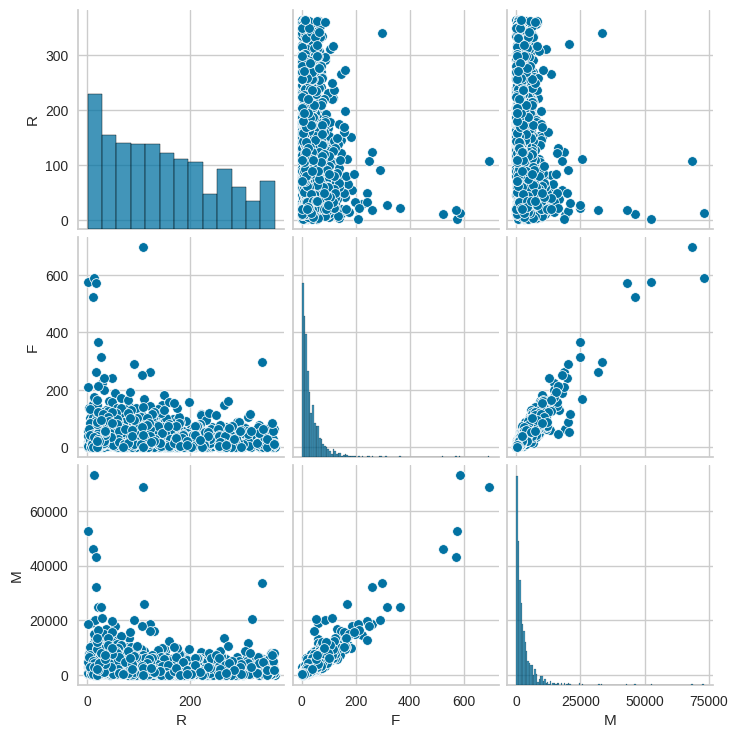

In [ ]:
sns.pairplot(rfm)
plt.show()

## 그냥 표준화 시켜봣음

Standardized Column 1: [-0.36596091310439344, -0.8370006387594848, -0.6996140521100832, -1.2491603987076898, -0.36596091310439344, -0.14025437789466214, 0.4387319515563877, -1.180467105382989, -1.0234538634979584, -0.44446753404690864, 0.11489214016851237, -0.29726761977969257, -0.21876099883717737, 0.1933987611110276, -0.49353417213598066, -1.3178536920323907, -0.13044105027684771, -1.2491603987076898, -0.04212110171651809, -0.6898007244922687, -0.6701740692566399, -0.41502755119346546, 0.27190538205354287, 0.252278726817914, 1.1551048676568392, -1.0234538634979584, 1.1845448505102825, 0.7625717629442631, -1.2491603987076898, 1.3023047819240552, -0.405214223575651, -1.2884137091789474, -0.9155072597020001, -1.2687870539433186, -0.8075606559060416, -0.8271873111416704, -1.0921471568226593, -1.1608404501473601, 0.026572191608182742, 0.06582550207944035, 0.21302541634665642, 0.04619884684381155, 0.05601217446162595, -0.20894767121936295, 0.1933987611110276, -0.04212110171651809, -1.01364

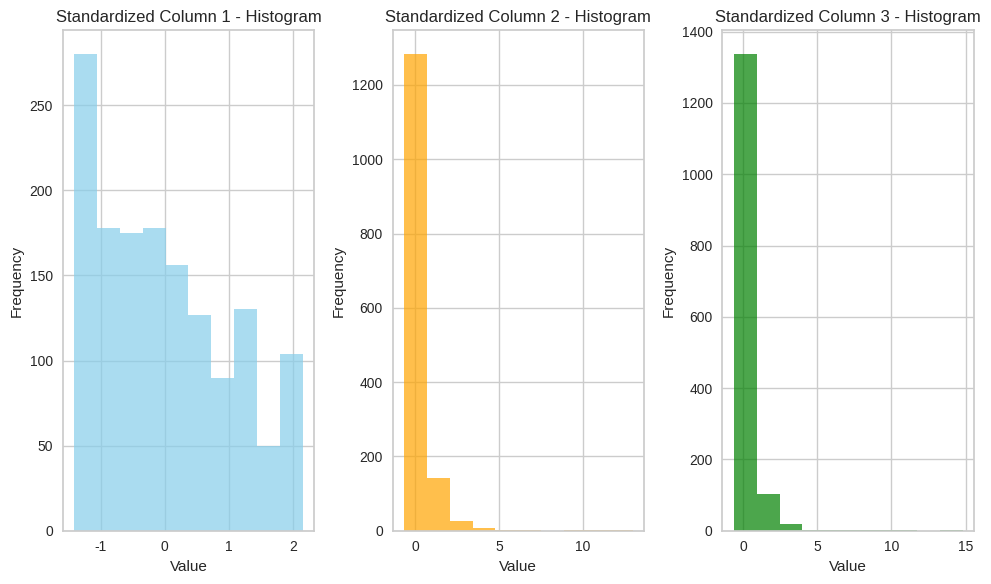

In [ ]:
# 각 칼럼의 평균과 표준편차 계산
mean1, std1 = np.mean(rfm['R']), np.std(rfm['R'])
mean2, std2 = np.mean(rfm['F']), np.std(rfm['F'])
mean3, std3 = np.mean(rfm['M']), np.std(rfm['M'])
# 표준화 수행
standardized_column1 = [(x - mean1) / std1 for x in rfm['R']]
standardized_column2 = [(x - mean2) / std2 for x in rfm['F']]
standardized_column3 = [(x - mean3) / std3 for x in rfm['M']]

# 결과 출력
print("Standardized Column 1:", standardized_column1)
print("Standardized Column 2:", standardized_column2)
print("Standardized Column 3:", standardized_column3)

# 분포 그래프 그리기
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(standardized_column1, bins=10, color='skyblue', alpha=0.7)
plt.title('Standardized Column 1 - Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(standardized_column2, bins=10, color='orange', alpha=0.7)
plt.title('Standardized Column 2 - Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(standardized_column3, bins=10, color='green', alpha=0.7)
plt.title('Standardized Column 3 - Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Cluster: 2 Loss: 17165704591.417751
Cluster: 3 Loss: 7273242505.408736
Cluster: 4 Loss: 4247526660.386304
Cluster: 5 Loss: 2745609408.0586243
Cluster: 6 Loss: 1950791028.2620022
Cluster: 7 Loss: 1344896175.7303374
Cluster: 8 Loss: 1003019016.9447259
Cluster: 9 Loss: 723252580.7731439
Best Cluster: 9 Best Loss: 723252580.7731439
Loss Avg: 4556755245.872704


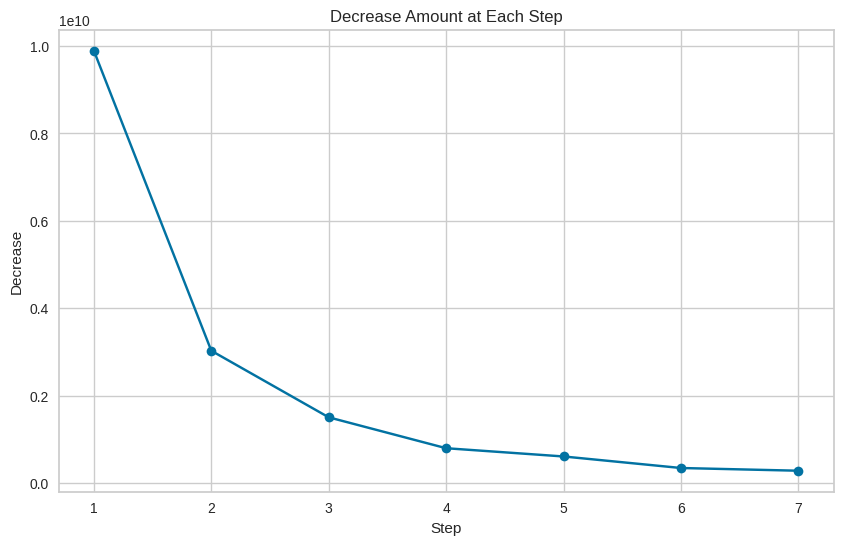

In [ ]:
LossFunc(rfm)

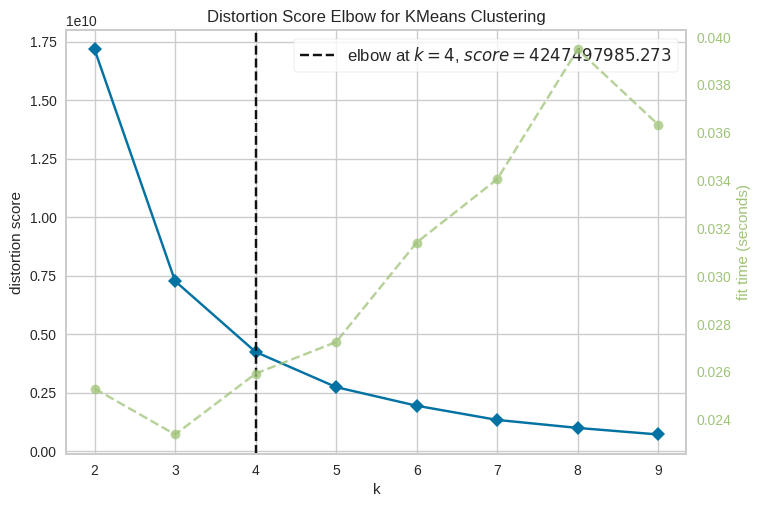

In [ ]:
ElbowMethod(rfm)

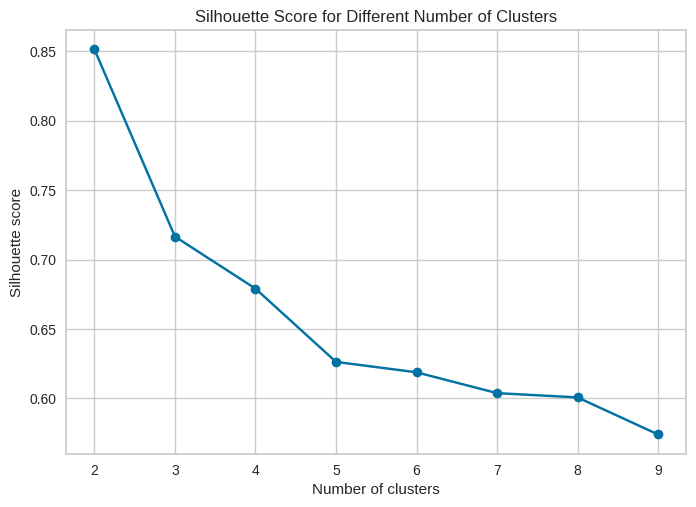

[0.851266804663423, 0.7165259156268101, 0.6790484501284275, 0.6263204888014035, 0.6188135729613938, 0.6038174870749722, 0.600730213987456, 0.574051237717396]


In [ ]:
SilhouetteScore(rfm)

In [ ]:
# K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm[['R','F','M']])

# 클러스터링 결과 출력
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("\nCluster Labels:")
print(kmeans.labels_)

# 클러스터링 결과를 데이터프레임에 추가
df_cluster = pd.DataFrame()
df_cluster['Cluster'] = kmeans.labels_
df_

Cluster Centers:
[[1.55577229e+02 1.91094440e+01 1.34384588e+03]
 [7.64411765e+01 1.79352941e+02 1.78030836e+04]
 [3.02000000e+01 5.90400000e+02 5.66834548e+04]
 [1.15777027e+02 7.50777027e+01 6.55509711e+03]]

Cluster Labels:
[0 1 0 ... 0 0 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NameError: name 'df_' is not defined

In [ ]:
import scipy.stats as stats

# 정규분포를 따르는 예제 데이터 생성
np.random.seed(0)

# Q-Q plot 그리기
plt.figure(figsize=(8, 6))
stats.probplot(rfm['R'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()

# 샤피로-윌크 검정 수행
_, p_value = stats.shapiro(rfm['R'])
print("Shapiro-Wilk Test p-value:", p_value)

# p-value를 기준으로 정규분포 여부 판단
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규분포를 따릅니다.")
else:
    print("데이터는 정규분포를 따르지 않습니다.")

Raw 데이터를 엘보우 기법, 실루엣 점수를 통해 얻은 적절한 K개(4)로 임시로
클러스터링을 진행해봤다 (K-means)

클러스터간 밀집도가 너무 다름 ( 0: 1132 / 1 :34 / 2:5 / 3:297 )

따라서 데이터 전처리를 통해 칼럼마다 가중치를 넣고 진행을 해야겠다고 생각함

특히 F, M컬럼은 Long tail의 형식을 띄므로 두 칼럼에 전처리를 진행할 것이다.

## 1. RFM Score

In [ ]:
rfm

이상치를 기준으로 MIN ~ Q3 에서 2개의 섹션 / 이상치 ~ MAX값에서 2개의 섹션으로 나눔

In [ ]:
def calculatet_outlier(df,column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    out = df[column].quantile(0.75) + iqr*1.5
    return int(out)

def outlier_df(df,col,threshold):
  outliers_df = df[df[col]>threshold]
  average_df = df[df[col]<=threshold]
  return average_df, outliers_df

# F_out_df = 이상치를 가진 데이터들
# 여기의 평균값을 기준으로 삼을 것
F_out = calculatet_outlier(rfm,'F')
M_out = calculatet_outlier(rfm,'M')
F_in_df, F_out_df = outlier_df(rfm,'F',F_out)
M_in_df, M_out_df = outlier_df(rfm,'M',M_out)
F_out_df_out = calculatet_outlier(F_out_df,'F')
M_out_df_out = calculatet_outlier(M_out_df,'M')


In [ ]:
display(rfm.describe())
display(F_in_df.describe())

In [ ]:
def CalPositions(series,threshold):
  a = percentileofscore(series,threshold)
  return int(a)
F_positions = []
M_positions = []
F_positions.append(CalPositions(F_out_df['F'],F_out_df['F'].mean()))
F_positions.append(CalPositions(F_out_df['F'],F_out_df_out))
M_positions.append(CalPositions(M_out_df['M'],M_out_df['M'].mean()))
M_positions.append(CalPositions(M_out_df['M'],M_out_df_out))

print(F_positions)
print(M_positions)

In [ ]:


# percentiles = [.50,.88]
# positions = [50,88]

# # 각 칼럼에 대한 히스토그램
# plt.hist(F_out_df['F'], bins=20, color='skyblue', alpha=0.7)
# plt.title('F_out Histogram')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# for position, percentile in zip(positions,percentiles):
#   percentile_value = np.percentile(F_out_df['F'], position)
#   plt.axvline(percentile_value, color='red',linestyle='--',label=f'{percentile}%')
#   plt.text(percentile_value, plt.ylim()[1], F_out_df['F'].quantile(percentile).round(2), color='red', verticalalignment='bottom', horizontalalignment='right')



def HisPercentile(df,col, positions):
  percentiles = np.array(positions)/100

  # 각 칼럼에 대한 히스토그램
  plt.hist(df[col], bins=20, color='skyblue', alpha=0.7)
  plt.title(f'{col} Histogram')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  for position, percentile in zip(positions,percentiles):
    percentile_value = np.percentile(df[col], position)
    plt.axvline(percentile_value, color='red',linestyle='--',label=f'{percentile}%')
    plt.text(percentile_value, plt.ylim()[1], df[col].quantile(percentile).round(2), color='red', verticalalignment='bottom', horizontalalignment='right')
  plt.show()


HisPercentile(F_out_df,'F', F_positions)
HisPercentile(M_out_df,'M', M_positions)


In [ ]:
# 군집4개

# 데이터최소~평균 / 평균~수염최대 / 수염최대~이상치들의평균 / 이상치들의평균~데이터최대
def RFMScore(df):
  rfm_score = pd.DataFrame()
  rfm_score['고객ID'] = df['고객ID']

  F_out = calculatet_outlier(df,'F')
  M_out = calculatet_outlier(df,'M')
  F_in_df, F_out_df = outlier_df(df,'F',F_out)
  M_in_df, M_out_df = outlier_df(df,'M',M_out)

  rfm_score['R'] = pd.qcut(df['R'],4,labels=[4,3,2,1])
  # rfm_score['R'] = pd.cut(df['R'],bins=[0,20,40,66,max(rfm['R'])],labels=[4,3,2,1])
  rfm_score['F'] = pd.cut(df['F'],bins=[0,F_in_df['F'].mean(),F_out,F_out_df_out,max(df['F'])],labels=[1,2,3,4])
  rfm_score['M'] = pd.cut(df['M'],bins=[0,M_in_df['M'].mean(),M_out,M_out_df_out,max(df['M'])],labels=[1,2,3,4])
  return rfm_score

rfm_score= RFMScore(rfm)
rfm_score

In [ ]:
F_out_df_out = calculatet_outlier(F_out_df,'F')
M_out_df_out = calculatet_outlier(M_out_df,'M')

display(F_out_df.describe())
display(M_out_df.describe())
print(F_out_df_out)
print(M_out_df_out)

In [ ]:
# 군집5개
rfm_score5 = pd.DataFrame()
rfm_score5['고객ID'] = rfm['고객ID']
rfm_score5['R'] = pd.qcut(rfm['R'],5,labels=[5,4,3,2,1])
rfm_score5['F'] = pd.cut(rfm['F'],bins=[0,F_in_df['F'].mean(),F_out,M_out_df['F'].mean(),F_out_df_out,max(rfm['F'])],labels=[1,2,3,4,5])
rfm_score5['M'] = pd.cut(rfm['M'],bins=[0,M_in_df['M'].mean(),M_out,M_out_df['M'].mean(),M_out_df_out,max(rfm['M'])],labels=[1,2,3,4,5])

display(rfm_score5)

In [ ]:
Distributions(rfm_score)

In [ ]:
LossFunc(rfm_score)

In [ ]:
ElbowMethod(rfm_score)

In [ ]:
SilhouetteScore(rfm_score)

In [ ]:
Distributions(rfm_score5)

In [ ]:
LossFunc(rfm_score5)

In [ ]:
ElbowMethod(rfm_score5)

In [ ]:
SilhouetteScore(rfm_score5)

## 2. Robust 스케일링


이상치가 많거나 이상치에 민감한 모델을 사용할 때 유용합니다.
중앙값과 IQR을 사용하기 때문에 이상치의 영향을 줄일 수 있습니다.

In [ ]:
rfm_features = rfm[['R','F','M']]
sc = RobustScaler()
rfm_robust = pd.DataFrame(sc.fit_transform(rfm_features),columns=rfm_features.columns)

In [ ]:
Distributions(rfm_robust)

In [ ]:
LossFunc(rfm_robust)

In [ ]:
ElbowMethod(rfm_robust)

In [ ]:
SilhouetteScore(rfm_robust)

## 3. 로그변환

데이터가 왜곡되어 있고, 정규분포에 가깝게 만들어야 할 때 사용됩니다.
예를 들어, 수입이나 가격과 같이 급격하게 변하는 데이터에 유용합니다.

In [ ]:
def RFMLog(df):
  rfm_log = pd.DataFrame()
  rfm_log['고객ID'] = rfm['고객ID']
  rfm_log['R'] = np.log1p(rfm['R'])
  rfm_log['F'] = np.log1p(rfm['F'])
  rfm_log['M'] = np.log1p(rfm['M'])
  return rfm_log

rfm_log = RFMLog(rfm)
rfm_log

In [ ]:
rfm_log.describe()

In [ ]:
sns.pairplot(rfm_log)

In [ ]:
Distributions(rfm_log)

In [ ]:
LossFunc(rfm_log)

In [ ]:
ElbowMethod(rfm_log)

In [ ]:
SilhouetteScore(rfm_log)

## 4. Box-Cox 변환


In [ ]:
from scipy.stats import boxcox

def RFMBox(df):
  rfm_box = df.copy()
  rfm_box['R'], paraR = boxcox(df['R'])
  rfm_box['F'], paraF = boxcox(df['F'])
  rfm_box['M'], paraM = boxcox(df['M'])
  return rfm_box
rfm_box = RFMBox(rfm)

In [ ]:
sns.pairplot(rfm_box)

In [ ]:
Distributions(rfm_box)

In [ ]:
LossFunc(rfm_box)

In [ ]:
ElbowMethod(rfm_box)

In [ ]:
SilhouetteScore(rfm_box)

# 클러스터링


< SCORE >

|Model|Loss Function|Elbow|Silhouette|
|---|---|---|---|
|RFM(4)|779|4 (686)|0.5237|
|RFM(5)|1182|4 (997)|0.4325|
|Robust|1477|4 (1476)|0.4621|
|Log|1961|4 (1961)|0.3710|
|BoxCox|37914|5 (37913)|0.3369|

> RFM(4) Score 기법 채택

## K means Clustering

In [ ]:
# 군집4개
rfm_score = RFMScore(rfm)
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_score[['R','F','M']])
cluster = kmeans.labels_
rfm2 = RFMLog(rfm)
# rfm = RFMBox(rfm)
rfm2['Cluster'] = cluster

rfm2

In [ ]:
rfm2['Cluster'].value_counts()

## 3 : 이탈위험 고객                   1277
## 2 : 일반                            683
## 0 : 프리미엄                        190
## 1 : 재구매유도                      1358

# rfm[rfm['고객ID']=='USER_1277']

In [ ]:
sns.pairplot(hue="Cluster",data=rfm2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm2['R'], rfm2['F'], rfm2['M'], c=rfm2['Cluster'], cmap='viridis')

# color bar 추가
cbar = plt.colorbar(scatter)
cbar.set_label('Hue')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
c0 = rfm2[rfm2['Cluster']==0]
c1 = rfm2[rfm2['Cluster']==1]
c2 = rfm2[rfm2['Cluster']==2]
c3 = rfm2[rfm2['Cluster']==3]

display(rfm2.describe())
display(c0.describe())
display(c1.describe())
display(c2.describe())
display(c3.describe())

In [ ]:
plt.figure(figsize=(8, 6))
for cluster_label, group in rfm2.groupby('Cluster'):
    plt.scatter(group['R'], [cluster_label] * len(group), label=f'Cluster {cluster_label}', alpha=0.5)
plt.title('Scatter Plot of R by Cluster')
plt.xlabel('R')
plt.ylabel('Cluster')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
for cluster_label, group in rfm2.groupby('Cluster'):
    plt.scatter(group['F'], [cluster_label] * len(group), label=f'Cluster {cluster_label}', alpha=0.5)
plt.title('Scatter Plot of F by Cluster')
plt.xlabel('F')
plt.ylabel('Cluster')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
for cluster_label, group in rfm2.groupby('Cluster'):
    plt.scatter(group['M'], [cluster_label] * len(group), label=f'Cluster {cluster_label}', alpha=0.5)
plt.title('Scatter Plot of M by Cluster')
plt.xlabel('M')
plt.ylabel('Cluster')
plt.legend()
plt.show()


|클러스터|갯수|R|F|M|해석|등급|
|:---:|---|---|---|---|---|---|
|0|62|↓|↑|↑|최근까지도 매장에 방문하며, 매장에 큰 이익을 가져다 주는 고객|프리미엄|
|1|768|↑|↓|↓|방문이 뜸하며 구매율도 적은 고객|이탈위험 고객|
|2|252|↓|↓|↓|자주 방문하지만, 높은 실적을 남기지는 않는 고객|일반 고객|
|3|386|↑|↑|↑|높은 실적을 냈지만, 최근 방문이 뜸해진 고객|재구매 유도 고객|

* 상세수치 (평균)

|클러스터|R|F|M|
|:---:|---|---|---|
|전체|145|36|2964|
|0|44|192|17659|
|1|188|13|900|
|2|21|30|2805|
|3|155|60|4814|



In [ ]:
df_all = df.merge(rfm2[['고객ID','Cluster']],on='고객ID')
df_all

In [ ]:
df_all.to_csv('/content/drive/MyDrive/eCommerce/EcommerceData.csv',index=False)

# 분석시작

|클러스터|등급|
|---|---|
|0|일반고객|
|1|재구매유도고객|
|2|프리미엄고객|
|3|이탈위험고객|

* 사용할 칼럼
> 고객ID / 제품카테고리	/ 수량	/ 배송료	/ 쿠폰상태 / 구매금액 /	초중말 /	월 /	요일 /	성별 /	고객지역 / 오프라인비용 /	온라인비용 / Cluster

* 사용할 데이터 프레임
> Premium / Churn

* 추가처리
> 배송료, 구매금액, 가입기간, 할인율, 오프라인비용, 온라인비용

나중엔
나와 비슷한 고객입력 > 고객의 소비패턴을 전부 분석해서 보여주자



In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

df = pd.read_csv('/content/drive/MyDrive/eCommerce/EcommerceData.csv')

display(df)
use_col = ['고객ID','제품카테고리','수량','평균금액','배송료','쿠폰상태','구매금액','초중말','월','요일','성별','고객지역','오프라인비용','온라인비용','Cluster']

df2 = df[use_col]
df['거래횟수'] = 1
df2['거래횟수'] = 1

General = df2[df2['Cluster']==0]
Repurchase = df2[df2['Cluster']==1]
Premium = df2[df2['Cluster']==2]
Premium2 = df[df['Cluster']==2]
Churn = df2[df2['Cluster']==3]
Churn2 = df[df['Cluster']==3]

Churn['고객지역'].value_counts()
Churn

In [ ]:
# Premium.info()
# Churn.info()

In [ ]:
import itertools
import numpy as np

month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
week = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
period = ['초','중','말']

def Reindex(df,col):
  if col == '월':
    df = df.reindex(month)
  if col == '요일':
    df = df.reindex(week)
  if col == '초중말':
    df = df.reindex(period)
  return df.fillna(0)

period_col = ['초','중','말','월별합계']
def GetInfo(df,col):
  # display(df)
  ## a, b,c에서는 구간별로 나눠서 진행하면 될듯 (4분위로 나누든 / 거래횟수 5회 이상~ 이런식)
  # a
  a_sum = df.groupby(col)['수량','거래횟수','구매금액'].sum()
  a_sum = a_sum.rename({'수량':'총 판매수량', '거래횟수':'총 거래횟수(중복포함)'},axis=1)
  a_sum = Reindex(a_sum,col)

  # b
  a_mean = df.copy()
  a_mean = a_mean.groupby(col)['구매금액','배송료','오프라인비용','온라인비용'].mean()
  a_mean = Reindex(a_mean,col)


  # c
  a_counts = df[['고객ID',col,'거래횟수']].drop_duplicates(subset=['고객ID'])
  a_counts = a_counts.groupby(col)['거래횟수'].sum()
  a_counts = pd.DataFrame(a_counts)
  a_counts = Reindex(a_counts,col)

  # d
  try:
    a_coupon = df.pivot_table(index=col,columns='쿠폰상태',values='거래횟수',aggfunc='sum')
    a_coupon = a_coupon.fillna(0)
    a_coupon = Reindex(a_coupon,col)
  except:
    a_coupon = pd.DataFrame()

  # e
  try:
    a_product = df.pivot_table(index=col,columns='제품카테고리',values='구매금액',aggfunc='sum').fillna(0)
    a_product = Reindex(a_product,col)
    a_product_n = df.pivot_table(index=[col],columns='제품카테고리',values='수량',aggfunc='sum').fillna(0)
    a_product_n = Reindex(a_product_n,col)
    a_product = pd.concat([a_product,a_product_n],axis=0)
    a_product = pd.DataFrame(a_product.to_records())
    product_index = []
    mid = len(a_product.index) // 2
    for i in range(mid):
        product_index.append(mid + i)
        product_index.append(i)

    a_product = a_product.reindex(product_index).reset_index(drop=True)
    col_name1 = a_product[col].unique()
    col_name2 = ['판매수','매출']
    a_product.index = [f"{c1}_{c2}" for c1 in col_name1 for c2 in col_name2]
    a_product = a_product.drop(col,axis=1)
  except:
    a_product = pd.DataFrame()


  # f
  try:
    all_combinations = pd.DataFrame(list(itertools.product(df[col].unique(), month, df['초중말'].unique())), columns=[col, '월', '초중말'])
    merged_data = pd.concat([all_combinations, df])

    pivot_table = merged_data.pivot_table(index=[col, '월'], columns='초중말', values='구매금액', aggfunc='count')
    pivot_table2 = merged_data.pivot_table(index=[col, '월'], columns='초중말', values='구매금액', aggfunc='sum')
    a_month = pivot_table.fillna(0)
    a_month2 = pivot_table2.fillna(0)
    a_month['월별합계'] = a_month.sum(axis=1)
    a_month = a_month[period_col]
    a_month2['월별합계'] = a_month2.sum(axis=1)
    a_month2 = a_month2[period_col]
    a_month2.columns = [p+'(매출)' for p in period_col]

    a_month = pd.concat([a_month,a_month2],axis=1)
    a_month = a_month.reindex(index=month,level=1)
    a_month = pd.DataFrame(a_month.to_records())

    month_index = list(range(len(a_month[col])))
    index_dict = {}
    for i, value in enumerate(month_index):
        if value not in index_dict:
            index_dict[value] = []
        index_dict[value].append(i%12)
    sorted_month = sorted(index_dict,key=index_dict.get)
    a_month = a_month.reindex(sorted_month)
    a_month = a_month.reset_index(drop=True)
    a_month = Reindex(a_month,col)
  except:
    a_month = pd.DataFrame()

  # g
  try:
    week
    a_week = df.pivot_table(index=col,columns='요일',values='구매금액',aggfunc='count')
    a_week = a_week[week]
    a_week2 = df.pivot_table(index=col,columns='요일',values='구매금액',aggfunc='sum')
    a_week2 = a_week2[week]
    a_week2.columns = [w+'(매출)' for w in week]
    a_week = pd.concat([a_week, a_week2],axis=1)
    a_week = Reindex(a_week,col)

  except:
    a_week = pd.DataFrame()

  return a_sum, a_mean,a_counts,a_coupon,a_product, a_month, a_week

# a,b,c,d,e,f,g = GetInfo(Premium,'초중말')
a,b,c,d,e,f,g = GetInfo(Premium,'성별')

성별 고객지역 초중말(f) 월(f) 요일(f[초중말], g) 제품카테고리(e) 쿠폰상태(d)

In [ ]:
a0,b0,c0,d0,e0,f0,g0 = GetInfo(Churn,'성별')
A0,B0,C0,D0,E0,F0,G0 = GetInfo(Premium,'성별')
a1,b1,c1,d1,e1,f1,g1 = GetInfo(Churn,'고객지역')
A1,B1,C1,D1,E1,F1,G1 = GetInfo(Premium,'고객지역')
a2,b2,c2,d2,e2,f2,g2 = GetInfo(Churn,'초중말')
A2,B2,C2,D2,E2,F2,G2 = GetInfo(Premium,'초중말')
a3,b3,c3,d3,e3,f3,g3 = GetInfo(Churn,'월')
A3,B3,C3,D3,E3,F3,G3 = GetInfo(Premium,'월')
a4,b4,c4,d4,e4,f4,g4 = GetInfo(Churn,'요일')
A4,B4,C4,D4,E4,F4,G4 = GetInfo(Premium,'요일')
a5,b5,c5,d5,e5,f5,g5 = GetInfo(Churn,'제품카테고리')
A5,B5,C5,D5,E5,F5,G5 = GetInfo(Premium,'제품카테고리')
a6,b6,c6,d6,e6,f6,g6 = GetInfo(Churn,'쿠폰상태')
A6,B6,C6,D6,E6,F6,G6 = GetInfo(Premium,'쿠폰상태')

colors = plt.cm.tab20.colors
colors = colors[:20]

내 분석의 한계

모두 더해서 하는거라 "유저 맞춤의 느낌은 없다".
모든 고객을 카테고리화를 해서 일반적인 진행을 한다.

클러스터링이 너무 "골고루다"
각 클러스터들의 분포가 고르다 > 차별점이 없다




왜 유저별 평균을 따로 구했나

원래는 A유저가 여러가지 기록을 갖고 있으니까 판단할게 많아서 A유저에 대한 대표값을 생각했다.

생각하니까


In [ ]:
display(g0)
# display(g1)
# display(g2)
# display(g3)
# display(g4)
# display(g5)
# display(g6)

## 1.SUM

In [ ]:
def a표(df):
  display(df)

a표(A0)
# a표(A1)
# a표(A2)
# a표(A3)
# a표(A4)
# a표(A5)
# a표(A6)

In [ ]:
a표(a0)
# a표(a1)
# a표(a2)
# a표(a3)
# a표(a4)
# a표(a5)
# a표(a6)

## 2.AVG

In [ ]:
def b표(df):
  display(df)

# b표(B0)
b표(B1)
# b표(B2)
# b표(B3)
# b표(B4)
# b표(B5)
# b표(B6)

In [ ]:
b표(b1)

## 3.고유 고객 수

In [ ]:
C0
# C1
# C2
# C3
# C4
# C5
# C6

In [ ]:
# a표(A0)
# b표(B0)
# C0

def abcMerge(df1,df2,df3):
  if len(df1.index) == len(df2.index):
    all = df1.merge(df2,on=[df1.index.name])
  if len(df1.index) == len(df3.index):
    all = all.merge(df3,on=[df1.index.name])
    all.columns = ['총 판매수량', '총 거래횟수', '총 매출', '평균 매출', '평균 배송료', '평균 오프라인비용','평균 온라인비용','고유 고객수']
  else:
    all.columns = ['총 판매수량', '총 거래횟수', '총 매출', '평균 매출', '평균 배송료', '평균 오프라인비용','평균 온라인비용']
  total_sales = all['총 판매수량'].sum()
  total_revenue = all['총 매출'].sum()
  total_transactions = all['총 거래횟수'].sum()

  # 비율 계산
  all['총 판매수량_비율'] = all['총 판매수량'] / total_sales
  all['총 매출_비율'] = all['총 매출'] / total_revenue
  all['총 거래횟수_비율'] = all['총 거래횟수'] / total_transactions
  all['총 판매 대비 매출_비율'] = all['총 매출_비율'] / all['총 판매수량_비율']
  display(all)

# C5

abcMerge(A0,B0,C0)
abcMerge(A1,B1,C1)
abcMerge(A2,B2,C2)
abcMerge(A3,B3,C3)
abcMerge(A4,B4,C4)
abcMerge(A5,B5,C5)
abcMerge(A6,B6,C6)

## 4.쿠폰상태

In [ ]:
# 클릭한 유저
# 사용한 유저
# 사용안한유저

def d쿠폰(df,width=20):
  # display(df)
  plt.figure(figsize=(width,5))
  d_df = df.stack().reset_index()
  d_df.columns = [df.index.name,'쿠폰상태','값']
  for i, column in enumerate(df.columns):
    df_column = d_df[d_df['쿠폰상태'] == column]
    x = range(len(df_column[df.index.name]))  # x축 인덱스

    plt.bar([p + i*0.2 for p in x], df_column['값'], width=0.2, label=column, alpha=0.5)

  x_list = range(0,len(df.index))
  x_list = [x+0.2 for x in x_list]
  plt.xticks(x_list,df.index)
  plt.xlabel(f'{df.index.name}')
  plt.ylabel('거래횟수')
  plt.title('쿠폰사용에 따른 거래횟수')
  plt.legend()
  plt.show()

# d쿠폰(D0)
# d쿠폰(D1)
# d쿠폰(D2)
# d쿠폰(D3)
# d쿠폰(D4)
d쿠폰(D5)
# # # d쿠폰(D6)

In [ ]:
d쿠폰(d1)

## 5.제품카테고리별 판매량, 매출

In [ ]:
explode = (0.1,0,0,0,0)

def e판매수(df,height=5):
  # display(df)
  for i in range(0,len(df.index),2):
    plt.figure(figsize=(15,height))
    df_5 = pd.DataFrame(df.iloc[i].nlargest(5))
    try:
      plt.subplot(1,2,1)
      plt.pie(df_5[df_5.columns[0]],autopct='%1.1f%%',colors=colors,explode=explode, shadow=True, startangle=90,labels=df_5.index)
      plt.title(f'{df.index[i]}')
      plt.legend(loc='upper left')
      plt.subplot(1,2,2)
      bars = plt.bar(df_5.index,df_5[df_5.columns[0]],color=colors)
      for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2,0, round(yval, 2), va='center',ha='center',fontweight='bold',fontsize=12)
      plt.xlabel('제품카테고리')
      plt.ylabel('판매수')
      plt.title(f'{df.index[i]}')
    except Exception as e:
      plt.subplot(1,2,1)
      plt.pie([])
      plt.title(f'{df.index[i]}')
      plt.legend(loc='upper left')
      plt.subplot(1,2,2)
      plt.bar([],[])
      plt.xlabel('제품카테고리')
      plt.ylabel('판매수')
      plt.title(f'{df.index[i]}')
  plt.show()

# e판매수(E0)
# e판매수(E1)
# e판매수(E2)
# e판매수(E3)
# e판매수(E4)
# e판매수(E5)
e판매수(E6)

In [ ]:
e판매수(e1)

In [ ]:
# display(e3)
def e매출(df,height=5):
  for i in range(1,len(df.index),2):
    plt.figure(figsize=(15,height))
    df_5 = pd.DataFrame(df.iloc[i].nlargest(5))
    plt.subplot(1,2,1)
    try:
      plt.pie(df_5[df_5.columns[0]],autopct='%1.1f%%',colors=colors,explode=explode, shadow=True, startangle=90,labels=df_5.index)

      plt.title(f'{df.index[i]}')
      plt.legend(loc='upper left')
      plt.subplot(1,2,2)
      bars = plt.bar(df_5.index,df_5[df_5.columns[0]],color=colors)
      for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2,0, round(yval, 2), va='center',ha='center',fontweight='bold',fontsize=12)
      plt.xlabel('제품카테고리')
      plt.ylabel('매출')
      plt.title(f'{df.index[i]}')
    except Exception as e:
      plt.pie([])
      plt.bar([],[])
  plt.show()

e매출(E0)
# e매출(E1)
# e매출(E2)
# e매출(E3)
# e매출(E4)
# # e매출(E5)
# e매출(E6)

In [ ]:
e매출(e1)

## 6.시간대별 판매량, 매출

### 1.월별 판매량, 매출


In [153]:
bar_colors = ['orange', 'lightblue', 'lightgreen', 'salmon', 'gold', 'lightcoral',
               'lightskyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral', 'lightskyblue',
              'skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral', 'lightskyblue',
               'lightgreen', 'salmon', 'gold', 'lightcoral', 'lightskyblue', 'lightgreen']

bar_colors2 = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral', 'lightskyblue',
               'lightgreen', 'salmon', 'gold', 'lightcoral', 'lightskyblue', 'lightgreen',
               'orange', 'lightblue', 'lightgreen', 'salmon', 'gold', 'lightcoral',
               'lightskyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral', 'lightskyblue']
def f월(df,height=10):
  standard = df.columns[0]
  plt.figure(figsize=(10,height))
  mid = float((len(df[standard].unique())-1)*0.2)

  for index2, i in enumerate(df[standard].unique()):
    fig, ax1 = plt.subplots()
    F_df = df[df[standard]==i]
    F_bar = plt.bar(F_df.index, F_df['월별합계'],width=1,color=colors[index2],label=f'{i}')
    plt.xticks(F_df.index//len(df[standard].unique())+1,month)

    ax2 = ax1.twinx()
    plt.plot(F_df.index,F_df['월별합계(매출)'],marker='o',color=colors[1+index2],linestyle='-', linewidth=2, label=f'{i}(매출)')
    plt.title(f'{df.columns[0]}별 월별 판매량 및 매출')
    plt.xlabel('월')
    plt.ylabel('매출')
    plt.xticks(F_df.index,month)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2)
    plt.grid(axis='y')



  plt.show()

# f월(F0)
# f월(F1,20)
# f월(F2)
# f월(F3)
# f월(F4)
# f월(F5,50)
# f월(F6)

In [ ]:
f월(f1,20)

### 2.초중말별 판매량, 매출

1.   항목 추가
2.   항목 추가



In [ ]:
def f초중말(df,month):
  F_df = df[df['월']==month].reset_index()
  F_value = F_df[['초','중','말']]
  F_value2 = F_df[['초(매출)','중(매출)','말(매출)']]


  for index, i in enumerate(F_df.index):
    fig, ax1 = plt.subplots()
    plt.bar(F_value.columns,F_value.iloc[i],width=0.5,color=colors[index],label=f'{F_df.iloc[i][df.columns[0]]}')
    plt.title(f'{month} 초/중/말 매출')
    plt.xlabel('초중말')
    plt.ylabel('매출')


    ax2 = ax1.twinx()
    plt.plot(F_value.columns, F_value2.iloc[i], marker='o',color=colors[1+index], label=f'{F_df.iloc[i][df.columns[0]]}(매출)')
    plt.title(f'{month} 초/중/말 매출')
    plt.xlabel('초중말')
    plt.ylabel('매출')

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2)

  plt.show()



# f초중말(F1,'Jan')
# # f초중말(F2,'Jan')
# # f초중말(F3,'Jan')
# # f초중말(F4,'Jan')
f초중말(F5,'Apr')
f초중말(F5,'Nov')
# f초중말(F6,'Jan')


In [ ]:
f초중말(f1,'Jan')

### 3.요일별 판매량, 매출


In [ ]:
def g요일(df):
# 그래프 그리기
  plt.figure(figsize=(20, 6))
  df_diff = df.pct_change(axis='columns') * 100
  week2 = [w+'(매출)' for w in week]
  df_diff = df_diff.fillna(0)
  for index, i in enumerate(df.index):
    fig, ax1 = plt.subplots()
    plt.bar(df[week].columns, df[week].loc[i], label=f'{i}',color=colors[3+index])

    ax2 = ax1.twinx()
    plt.plot(df[week].columns, df[week2].loc[i], marker='o', label=f'{i}(매출)',color=colors[index])
    plt.title('요일별 판매량 매출')
    plt.xlabel('요일')
    plt.ylabel('판매량')
    plt.ylabel('매출')

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2)


  plt.show()

# g요일(G0)
# g요일(G1)
# g요일(G2)
# g요일(G3)
# # g요일(G4)
g요일(G5)
# g요일(G6)

In [ ]:
g요일(g1)